In [71]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import sklearn.datasets as sk_data 
from sklearn.preprocessing import MinMaxScaler

# Perte de précision quand on augmente la profondeur du réseau (disparition de gradient sur le jeu de données des vêtements)



In [72]:
# test sur les vetements
fashion_mnist=keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test)=fashion_mnist.load_data()

# donnees d'apprentissage et de test
X_valid, X_train=X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train=y_train_full[:5000], y_train_full[5000:]

# renommage des labels finaux
class_names=["T-shirt", "Pantalon", "Pull-over", "Robe", "Manteau", "Sandale", "Chemise", "Basket", "Sac", "Bottine"]


Train: 0.884, Test: 0.876


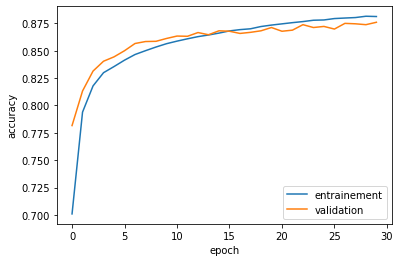

verification :  ['Bottine' 'Pull-over' 'Pantalon']


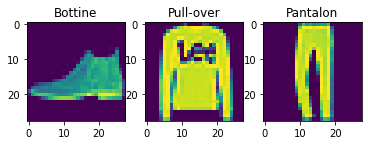

In [3]:
# reseau de neurones : 1 couche cachée de 30 neurones avec sigmoid
model=keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]), 
    keras.layers.Dense(30, activation="sigmoid"),
    keras.layers.Dense(10, activation="softmax")
])

# choix de la fonction cout et de la methode de descente
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

# on lance l'apprentissage
history=model.fit(X_train, y_train, batch_size=10, epochs=30, validation_data=(X_valid, y_valid), verbose=0)

# on évalue le modèle
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, valid_acc = model.evaluate(X_valid, y_valid, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, valid_acc))

# on trace l'historique
plt.figure(1)
plt.clf()
plt.plot(history.history['accuracy'], label='entrainement')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

# on teste le modèle
X_new=X_test[:3]
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_predict = np.array(class_names)[y_pred]
y_new = y_test[:3]

fig=plt.figure(2)
plt.clf()
for i in range(0,3):
  plt.subplot(1, 3, i+1)
  plt.imshow(X_test[i])
  plt.title(y_predict[i])
print("verification : ", np.array(class_names)[y_new])


Train: 0.852, Test: 0.846


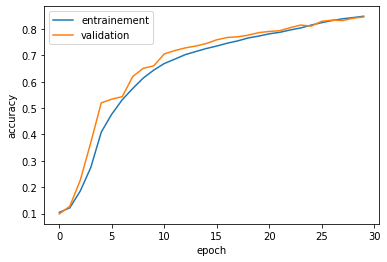

verification :  ['Bottine' 'Pull-over' 'Pantalon']


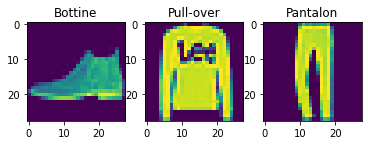

In [17]:
# reseau de neurones : 4 couches cachées de 30 neurones avec sigmoid
model2=keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]), 
    keras.layers.Dense(30, activation="sigmoid"),
    keras.layers.Dense(30, activation="sigmoid"),
    keras.layers.Dense(30, activation="sigmoid"),
    keras.layers.Dense(30, activation="sigmoid"),
    keras.layers.Dense(10, activation="softmax")
])

# choix de la fonction cout et de la methode de descente
model2.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

# on lance l'apprentissage
history2=model2.fit(X_train, y_train, batch_size=10, epochs=30, validation_data=(X_valid, y_valid), verbose=0)

# on évalue le modèle
_, train_acc = model2.evaluate(X_train, y_train, verbose=0)
_, valid_acc = model2.evaluate(X_valid, y_valid, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, valid_acc))

#on trace l'historique
plt.figure(1)
plt.clf()
plt.plot(history2.history['accuracy'], label='entrainement')
plt.plot(history2.history['val_accuracy'], label='validation')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

# on teste le modèle
X_new=X_test[:3]
y_pred = np.argmax(model2.predict(X_new), axis=-1)
y_predict = np.array(class_names)[y_pred]
y_new = y_test[:3]

fig=plt.figure(2)
plt.clf()
for i in range(0,3):
  plt.subplot(1, 3, i+1)
  plt.imshow(X_test[i])
  plt.title(y_predict[i])
print("verification : ", np.array(class_names)[y_new])


Train: 0.112, Test: 0.110


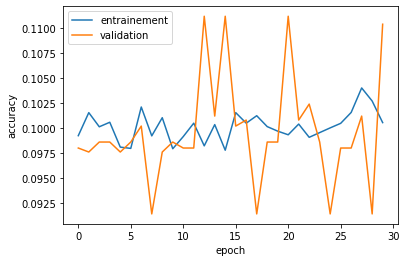

verification :  ['Bottine' 'Pull-over' 'Pantalon']


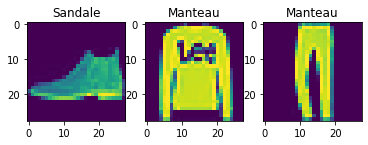

In [74]:
# reseau de neurones : 6 couches cachées de 30 neurones avec sigmoid
model3=keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]), 
    keras.layers.Dense(30, activation="sigmoid"),
    keras.layers.Dense(30, activation="sigmoid"),
    keras.layers.Dense(30, activation="sigmoid"),
    keras.layers.Dense(30, activation="sigmoid"),
    keras.layers.Dense(30, activation="sigmoid"),
    keras.layers.Dense(30, activation="sigmoid"),
    keras.layers.Dense(10, activation="softmax")
])

# choix de la fonction cout et de la methode de descente
model3.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

# on lance l'apprentissage
history3=model3.fit(X_train, y_train, batch_size=10, epochs=30, validation_data=(X_valid, y_valid), verbose=0)

# on évalue le modèle
_, train_acc = model3.evaluate(X_train, y_train, verbose=0)
_, valid_acc = model3.evaluate(X_valid, y_valid, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, valid_acc))

# on trace l'historique
plt.figure(1)
plt.clf()
plt.plot(history3.history['accuracy'], label='entrainement')
plt.plot(history3.history['val_accuracy'], label='validation')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

# on teste le modèle
X_new=X_test[:3]
y_pred = np.argmax(model3.predict(X_new), axis=-1)
y_predict = np.array(class_names)[y_pred]
y_new = y_test[:3]

fig=plt.figure(2)
plt.clf()
for i in range(0,3):
  plt.subplot(1, 3, i+1)
  plt.imshow(X_test[i])
  plt.title(y_predict[i])
print("verification : ", np.array(class_names)[y_new])


Une solution : utiliser la fonction d'activation ReLU

Train: 0.915, Test: 0.883


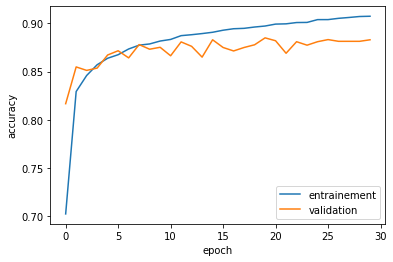

verification :  ['Bottine' 'Pull-over' 'Pantalon']


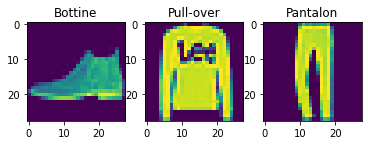

In [6]:
# reseau de neurones : 6 couches cachées de 30 neurones avec ReLU
model4_relu=keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]), 
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

# choix de la fonction cout et de la methode de descente
model4_relu.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

# on lance l'apprentissage
history4=model4_relu.fit(X_train, y_train, batch_size=10, epochs=30, validation_data=(X_valid, y_valid), verbose=0)


# on évalue le modèle
_, train_acc = model4_relu.evaluate(X_train, y_train, verbose=0)
_, valid_acc = model4_relu.evaluate(X_valid, y_valid, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, valid_acc))

# on trace l'historique
plt.figure(1)
plt.clf()
plt.plot(history4.history['accuracy'], label='entrainement')
plt.plot(history4.history['val_accuracy'], label='validation')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

# on teste le modèle
X_new=X_test[:3]
y_pred = np.argmax(model4_relu.predict(X_new), axis=-1)
y_predict = np.array(class_names)[y_pred]
y_new = y_test[:3]

fig = plt.figure(2)
plt.clf()
for i in range(0,3):
  plt.subplot(1, 3, i+1)
  plt.imshow(X_test[i])
  plt.title(y_predict[i])
print("verification : ", np.array(class_names)[y_new])

# Comparaison Tanh / ReLU


## jeu de données en spirale

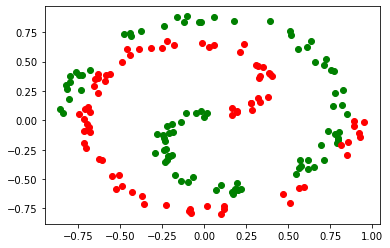

In [67]:
# création du jeu de données
def spiral1(theta):
  r=theta/(1+theta)
  return np.array([r*np.cos(theta), r*np.sin(theta)])

def spiral2(theta):
  r=-theta/(1+theta)
  return np.array([r*np.cos(theta), r*np.sin(theta)])

nb=100001
sol1=np.zeros((nb, 2))
sol2=np.zeros((nb, 2))
theta=np.linspace(0,2*np.pi, nb)
for i in range(nb):
  sol1[i, :]=spiral1(theta[i])+0.1*np.random.rand(2)
  sol2[i, :]=spiral2(theta[i])+0.1*np.random.rand(2)

# on selectionne les 250 premieres lignes apres avoir mélangé : classe 1 (les autres : classe 0)
np.random.shuffle(sol1)    
np.random.shuffle(sol2)
X_sol1 = sol1[:250,:]
y_sol1 = np.ones((250, 1))   # 1 = rouge
X_sol2 = sol2[:250,:]
y_sol2 = np.zeros((250, 1))   # 0 = vert

# on crée notre jeu de données
Donnees_sol1 = np.concatenate([X_sol1, y_sol1], axis=1)
Donnees_sol2 = np.concatenate([X_sol2, y_sol2], axis=1)
Donnees_full = np.concatenate([Donnees_sol1, Donnees_sol2], axis=0)

# on remelange tout
np.random.shuffle(Donnees_full)

X_train = Donnees_full[:170, 0:2]
X_valid = Donnees_full[170:490, 0:2]
X_test = Donnees_full[490:, 0:2]

y_train = np.array(Donnees_full[:170, 2], dtype=int)
y_valid = np.array(Donnees_full[170:490, 2], dtype=int)
y_test = np.array(Donnees_full[490:, 2], dtype=int)

class_names=["g", "r"]
color_train= np.array(class_names)[y_train]
color_valid= np.array(class_names)[y_valid]
color_test= np.array(class_names)[y_test]

plt.figure(1)
plt.clf()
for i in range(0,170):
    plt.plot(X_train[i,0], X_train[i,1], color=color_train[i], marker="o")
plt.show()


Train: 0.535, Test: 0.516


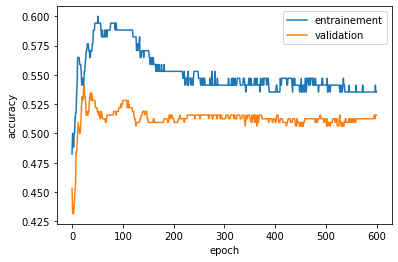

In [23]:
# reseau de neurones : 4 couches cachées de 8 neurones avec tanh
model5=keras.models.Sequential([
    keras.layers.Flatten(input_shape=X_train.shape[1:]), 
    keras.layers.Dense(8, activation="tanh"),
    keras.layers.Dense(8, activation="tanh"),
    keras.layers.Dense(8, activation="tanh"),
    keras.layers.Dense(8, activation="tanh"),
    keras.layers.Dense(2, activation="softmax")
])

# choix de la fonction cout et de la methode de descente
model5.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

# on lance l'apprentissage
history5=model5.fit(X_train, y_train, epochs=600, batch_size=100, validation_data=(X_valid, y_valid), verbose=0)

# on évalue le modèle
_, train_acc = model5.evaluate(X_train, y_train, verbose=0)
_, valid_acc = model5.evaluate(X_valid, y_valid, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, valid_acc))

# on trace l'historique
plt.figure(1)
plt.clf()
plt.plot(history5.history['accuracy'], label='entrainement')
plt.plot(history5.history['val_accuracy'], label='validation')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()


Train: 0.600, Test: 0.569


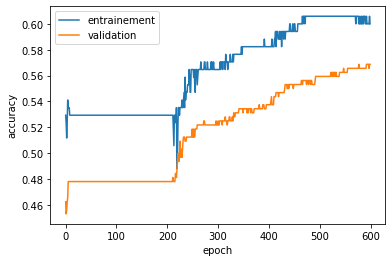

In [70]:
# reseau de neurones : 4 couches cachées de 8 neurones avec relu
model6=keras.models.Sequential([
    keras.layers.Flatten(input_shape=X_train.shape[1:]), 
    keras.layers.Dense(8, activation="relu"),
    keras.layers.Dense(8, activation="relu"),
    keras.layers.Dense(8, activation="relu"),
    keras.layers.Dense(8, activation="relu"),
    keras.layers.Dense(2, activation="softmax")
])

# choix de la fonction cout et de la methode de descente
model6.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

# on lance l'apprentissage
history6=model6.fit(X_train, y_train, epochs=600, batch_size=100, validation_data=(X_valid, y_valid), verbose=0)

# on évalue le modèle
_, train_acc = model6.evaluate(X_train, y_train, verbose=0)
_, valid_acc = model6.evaluate(X_valid, y_valid, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, valid_acc))

# on trace l'historique 
plt.figure(1)
plt.clf()
plt.plot(history6.history['accuracy'], label='entrainement')
plt.plot(history6.history['val_accuracy'], label='validation')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()


## jeu de données du cercle

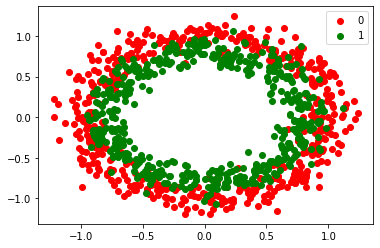

In [59]:
# on génère le cercle
X, y = sk_data.make_circles(n_samples=1000, noise=0.1, random_state=1)

# on crée les 2 classes
color_vect=['r', 'g']
plt.figure(1)
plt.clf()
for i in range(2):
    samples_ix = np.where(y == i)
    plt.scatter(X[samples_ix, 0], X[samples_ix, 1], label=str(i), color=color_vect[i])
plt.legend()
plt.show()


# on s'assure que les données X soient dans [-1, 1]
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)

# données d'entrainement et données test
n_train = 500
X_train, X_valid = X[:n_train, :], X[n_train:, :]
y_train, y_valid = y[:n_train], y[n_train:]



Train: 0.524, Test: 0.490


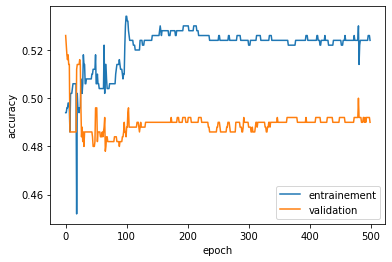

In [48]:
# réseau de neurones : 5 couches cachées de 5 neurones avec tanh
init = keras.initializers.RandomUniform(minval=0, maxval=1)
model7 = keras.models.Sequential([
        keras.layers.Dense(5, input_dim=2, activation='tanh', kernel_initializer=init), 
        keras.layers.Dense(5, activation='tanh', kernel_initializer=init),
        keras.layers.Dense(5, activation='tanh', kernel_initializer=init),
        keras.layers.Dense(5, activation='tanh', kernel_initializer=init),
        keras.layers.Dense(5, activation='tanh', kernel_initializer=init),
        keras.layers.Dense(1, activation='sigmoid', kernel_initializer=init)
])

# choix de la fonction cout et de la methode de descente
opt = keras.optimizers.SGD(lr=0.01, momentum=0.9)
model7.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# on lance l'apprentissage
history7 = model7.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=500, batch_size=200, verbose=0)

# on évalue le modèle
_, train_acc = model7.evaluate(X_train, y_train, verbose=0)
_, valid_acc = model7.evaluate(X_valid, y_valid, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, valid_acc))

# on trace l'historique
plt.figure(1)
plt.clf()
plt.plot(history7.history['accuracy'], label='entrainement')
plt.plot(history7.history['val_accuracy'], label='validation')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()


Train: 0.830, Test: 0.826


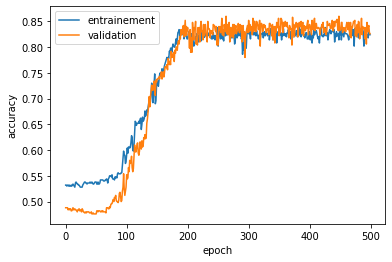

In [49]:
# réseau de neurones : 5 couches cachées de 5 neurones avec relu
model8 = keras.models.Sequential([
  keras.layers.Dense(5, input_dim=2, activation='relu'),
  keras.layers.Dense(5, activation='relu'),
  keras.layers.Dense(5, activation='relu'),
  keras.layers.Dense(5, activation='relu'),
  keras.layers.Dense(5, activation='relu'),
  keras.layers.Dense(1, activation='sigmoid')
])

# choix de la fonction cout et de la methode de descente
opt = keras.optimizers.SGD(lr=0.01, momentum=0.9)
model8.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# on lance l'apprentissage
history8 = model8.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=500, batch_size=200, verbose=0)

# on évalue le modèle
_, train_acc = model8.evaluate(X_train, y_train, verbose=0)
_, valid_acc = model8.evaluate(X_valid, y_valid, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, valid_acc))

# on trace l'historique
plt.figure(1)
plt.clf()
plt.plot(history8.history['accuracy'], label='entrainement')
plt.plot(history8.history['val_accuracy'], label='validation')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()



# Pour les réseaux très profonds : besoin de la normalisation par lot (Batch-Normalization)


Train: 0.504, Test: 0.496


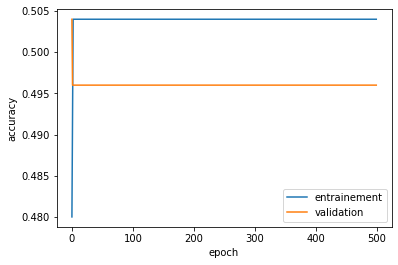

In [13]:
# réseaux de neurones : 20 couches cachées de 5 neurones chacune avec relu
model9 = keras.models.Sequential([
  keras.layers.Dense(5, input_dim=2, activation='relu'),
  keras.layers.Dense(5, activation='relu'),
  keras.layers.Dense(5, activation='relu'),
  keras.layers.Dense(5, activation='relu'),
  keras.layers.Dense(5, activation='relu'),
  keras.layers.Dense(5, activation='relu'),
  keras.layers.Dense(5, activation='relu'),
  keras.layers.Dense(5, activation='relu'),
  keras.layers.Dense(5, activation='relu'),
  keras.layers.Dense(5, activation='relu'),
  keras.layers.Dense(5, activation='relu'),
  keras.layers.Dense(5, activation='relu'),
  keras.layers.Dense(5, activation='relu'),
  keras.layers.Dense(5, activation='relu'),
  keras.layers.Dense(5, activation='relu'),
  keras.layers.Dense(5, activation='relu'),
  keras.layers.Dense(5, activation='relu'),
  keras.layers.Dense(5, activation='relu'),
  keras.layers.Dense(5, activation='relu'),
  keras.layers.Dense(5, activation='relu'),
  keras.layers.Dense(1, activation='sigmoid')
])

# choix de la fonction cout et de la methode de descente
opt = keras.optimizers.SGD(lr=0.01, momentum=0.9)
model9.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# on lance l'apprentissage
history9 = model9.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=500, batch_size=200, verbose=0)

# on évalue le modèle
_, train_acc = model9.evaluate(X_train, y_train, verbose=0)
_, valid_acc = model9.evaluate(X_valid, y_valid, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, valid_acc))

# on trace l'historique
plt.figure(1)
plt.plot(history9.history['accuracy'], label='entrainement')
plt.plot(history9.history['val_accuracy'], label='validation')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()



Train: 0.730, Test: 0.716


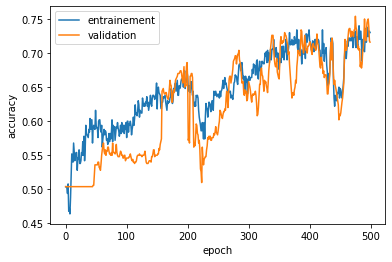

In [60]:
# avec ReLU et la Batch-Normalisation !!
# réseaux de neurones : 20 couches cachées de 5 neurones chacune avec relu
model10 = keras.models.Sequential([
   keras.layers.Dense(5, input_dim=2, activation='linear'),
  keras.layers.BatchNormalization(),
  keras.layers.Activation("relu"),
   keras.layers.Dense(5, activation='linear'),
  keras.layers.BatchNormalization(),
  keras.layers.Activation("relu"),
   keras.layers.Dense(5, activation='linear'),
  keras.layers.BatchNormalization(),
  keras.layers.Activation("relu"),
   keras.layers.Dense(5, activation='linear'),
  keras.layers.BatchNormalization(),
  keras.layers.Activation("relu"),
   keras.layers.Dense(5, activation='linear'),
  keras.layers.BatchNormalization(),
  keras.layers.Activation("relu"),
    keras.layers.Dense(5, activation='linear'),
  keras.layers.BatchNormalization(),
  keras.layers.Activation("relu"),
   keras.layers.Dense(5, activation='linear'),
  keras.layers.BatchNormalization(),
  keras.layers.Activation("relu"),
    keras.layers.Dense(5, activation='linear'),
  keras.layers.BatchNormalization(),
  keras.layers.Activation("relu"),
   keras.layers.Dense(5, activation='linear'),
  keras.layers.BatchNormalization(),
  keras.layers.Activation("relu"),
    keras.layers.Dense(5, activation='linear'),
  keras.layers.BatchNormalization(),
  keras.layers.Activation("relu"),
   keras.layers.Dense(5, activation='linear'),
  keras.layers.BatchNormalization(),
  keras.layers.Activation("relu"),
    keras.layers.Dense(5, activation='linear'),
  keras.layers.BatchNormalization(),
  keras.layers.Activation("relu"),
   keras.layers.Dense(5, activation='linear'),
  keras.layers.BatchNormalization(),
  keras.layers.Activation("relu"),
    keras.layers.Dense(5, activation='linear'),
  keras.layers.BatchNormalization(),
  keras.layers.Activation("relu"),
   keras.layers.Dense(5, activation='linear'),
  keras.layers.BatchNormalization(),
  keras.layers.Activation("relu"),
    keras.layers.Dense(5, activation='linear'),
  keras.layers.BatchNormalization(),
  keras.layers.Activation("relu"),
   keras.layers.Dense(5, activation='linear'),
  keras.layers.BatchNormalization(),
  keras.layers.Activation("relu"),
    keras.layers.Dense(5, activation='linear'),
  keras.layers.BatchNormalization(),
  keras.layers.Activation("relu"),
   keras.layers.Dense(5, activation='linear'),
  keras.layers.BatchNormalization(),
  keras.layers.Activation("relu"),
  keras.layers.Dense(1, activation='sigmoid')
])

# choix de la fonction cout et de la methode de descente
opt = keras.optimizers.SGD(lr=0.01, momentum=0.9)
model10.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# on lance l'apprentissage
history10 = model10.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=500, batch_size=200, verbose=0)

# on évalue le modèle
_, train_acc = model10.evaluate(X_train, y_train, verbose=0)
_, valid_acc = model10.evaluate(X_valid, y_valid, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, valid_acc))

# on trace l'historique
plt.figure(1)
plt.clf()
plt.plot(history10.history['accuracy'], label='entrainement')
plt.plot(history10.history['val_accuracy'], label='validation')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()
